In [1]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
import seaborn as sns  #画密度图
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
import palettable #python颜色库

In [2]:
# group_info = pd.read_csv('groupinfo(G1 mentor).csv')
group_info = pd.read_csv('group_info_OnlyLastAuthorPaper(current_scientific_age1213).csv')

In [3]:
group_info.head(5)

,work_id,author_position,author_id,institution_id,publication_year,first_pub_year,scientific_age,group_size,mentor_id,current_year,ratio_institution,current_scientific_age
0,W1987398976,first,A1973568665,I126307644,1989,1988,1,2,A1095119240,1989,1.0,1
1,W2009362099,first,A1973568665,I126307644,1989,1988,1,2,A1095119240,1989,1.0,1
2,W2128354159,first,A2350033295,I126307644,1989,1985,4,2,A1095119240,1989,1.0,4
3,W1987398976,first,A1973568665,I126307644,1989,1988,1,2,A1095119240,1990,1.0,2
4,W2009362099,first,A1973568665,I126307644,1989,1988,1,2,A1095119240,1990,1.0,2


In [5]:
inpath = '/Users/yanmemgxing/Nutstore Files/scientific group/'

In [6]:
file = 'career_span'
career_span = pd.read_csv(f'{inpath}{file}.csv')

In [7]:
career_span.head(5)

,author_id,first_pub_year,last_pub_year,career_len
0,A1011734083,2002,2022,20
1,A101902757,2013,2017,4
2,A102530866,1957,1957,0
3,A1040500386,1997,2020,23
4,A1055365530,2013,2014,1


In [32]:
mentors = set(group_info.mentor_id)
all_authors = set(career_span.author_id)
len(mentors)==len(mentors.intersection(all_authors))

True

In [33]:
mentees = set(group_info.author_id)
all_authors = set(career_span.author_id)
len(mentees)==len(mentees.intersection(all_authors))

True

In [8]:
group_info = group_info.merge(career_span[['author_id','career_len']],on='author_id',how='left')

In [9]:
tp = career_span[['author_id','first_pub_year']].rename(columns={'author_id':'mentor_id','first_pub_year':'mentor_first_pub_year'}).drop_duplicates()
group_info = group_info.merge(tp,on='mentor_id',how='left')

In [10]:
mentor_scientific_age = group_info['publication_year'] - group_info['mentor_first_pub_year']
group_info['mentor_scientific_age'] = mentor_scientific_age
mentor_current_scientific_age = group_info['current_year'] - group_info['mentor_first_pub_year']
group_info['mentor_current_scientific_age'] = mentor_current_scientific_age

In [11]:
group_info.head(5)

,work_id,author_position,author_id,institution_id,publication_year,first_pub_year,scientific_age,group_size,mentor_id,current_year,ratio_institution,current_scientific_age,career_len,mentor_first_pub_year,mentor_scientific_age,mentor_current_scientific_age
0,W1987398976,first,A1973568665,I126307644,1989,1988,1,2,A1095119240,1989,1.0,1,33,1985,4,4
1,W2009362099,first,A1973568665,I126307644,1989,1988,1,2,A1095119240,1989,1.0,1,33,1985,4,4
2,W2128354159,first,A2350033295,I126307644,1989,1985,4,2,A1095119240,1989,1.0,4,32,1985,4,4
3,W1987398976,first,A1973568665,I126307644,1989,1988,1,2,A1095119240,1990,1.0,2,33,1985,4,5
4,W2009362099,first,A1973568665,I126307644,1989,1988,1,2,A1095119240,1990,1.0,2,33,1985,4,5


In [12]:
len(group_info)

3968354

In [13]:
# filter condition
group_test = group_info[['author_id','mentor_id','institution_id','current_year','career_len',
                         'group_size']][(group_info.current_scientific_age<6)&(group_info.mentor_scientific_age>10)].drop_duplicates()

# function
def group_size_end_year(tp_df):
    # tp_df = tp_df[['author_id','mentor_id','institution_id','current_year','career_len','group_size']].drop_duplicates()
    end_year = round(np.min(tp_df['current_year']))
    career_len = np.mean(tp_df['career_len'])
    group_size = round(np.mean(tp_df['group_size']))
    
    return end_year,career_len,group_size

temp = group_test.groupby(['author_id','mentor_id','institution_id']).apply(group_size_end_year).reset_index(name='group_size_info')

In [14]:
group_size_info = pd.DataFrame(temp.group_size_info.tolist(),columns=['end_year','career_len','group_size'])
temp = pd.concat((temp,group_size_info),axis=1)
average_group_size = temp.groupby(['author_id','end_year','career_len'])['group_size'].agg('mean').reset_index(name='average_group_size')
print(len(average_group_size))

215296


In [16]:
group_info = group_info.merge(average_group_size,on='author_id',how='left')

In [19]:
group_info = group_info.drop(columns=['career_len_x']).rename(columns={'career_len_y':'career_len'})

In [1]:
# group_info.to_csv('groupinfo(G1 mentor).csv',index=0)

In [18]:
average_group_size.sample(5)

,author_id,end_year,career_len,average_group_size
124578,A2626688840,2012,0.0,7.0
28818,A2091213365,2009,12.0,16.0
99323,A2491725674,1998,5.0,16.0
201250,A3177469341,2005,0.0,14.0
30212,A2097090906,1993,5.0,45.0


In [42]:
mentee = list(set(group_info['author_id']))

In [108]:
def survial_rate(data,current_year,drop_criteria):
    # data_i = data[data.first_pub_year==current_year]
    data_i = data[data.end_year==current_year]
    Q75 = np.quantile(data_i['average_group_size'],0.75)
    Q50 = np.quantile(data_i['average_group_size'],0.50)
    Q25 = np.quantile(data_i['average_group_size'],0.25)
    Q10 = np.quantile(data_i['average_group_size'],0.10)
    
    #All
    survial_all = data_i[data_i.career_len>=drop_criteria]
    survival_rate_all = len(survial_all)/len(data_i[data_i.career_len>0])
    survival_rate_all_0 = len(survial_all)/len(data_i)
    
    # G75
    G75 = data_i[data_i.average_group_size>=Q75]
    survial_75 = G75[G75.career_len>=drop_criteria]
    survival_rate_75 = len(survial_75)/len(G75[G75.career_len>0])
    survival_rate_75_0 = len(survial_75)/len(G75)
    # print('survival_rate_75,survival_rate_75_0 : ',survival_rate_75,survival_rate_75_0)

    # G25
    G25 = data_i[data_i.average_group_size<=Q25]
    # print('len_G25 : ',len(G25))
    survial_25 = G25[G25.career_len>=drop_criteria]
    # print('len_survival_25 : ',len(survial_25))
    survival_rate_25 = len(survial_25)/len(G25[G25.career_len>0])
    survival_rate_25_0 = len(survial_25)/len(G25)
    # print('survival_rate_25,survival_rate_25_0 : ',survival_rate_25,survival_rate_25_0)
    return len(data_i),len(data_i[data_i.career_len>0]),len(survial_all),survival_rate_all,survival_rate_all_0,survival_rate_75,survival_rate_75_0,survival_rate_25,survival_rate_25_0

In [44]:
survial_rate(average_group_size,2005,10)

(6674,
 0.5143418467583497,
 0.3922685046448906,
 0.47442958300550747,
 0.35345838218053927,
 0.5430637738330046,
 0.4320083682008368)

In [109]:
data = average_group_size

Data = []
years = list(range(1960,2015+1))
# years = list(range(2008,2015+1))
# Drop_Criteria = list(range(5,15+1))
Drop_Criteria = [5,8,10,13,15,18,20]
for drop_criteria in Drop_Criteria:
    for current_year in years:
        # print(drop_criteria,completeness,current_year)

        num_of_mentee,num_of_mentee1,num_of_surviver,survival_rate_all,survival_rate_all_0,survival_rate_75,survival_rate_75_0,survival_rate_25,survival_rate_25_0 = survial_rate(data,current_year,drop_criteria)

        temp = [current_year,num_of_mentee,num_of_mentee1,num_of_surviver,survival_rate_all,survival_rate_all_0,survival_rate_75,survival_rate_75_0,survival_rate_25,survival_rate_25_0,drop_criteria]
        Data.append(temp)

In [110]:
Data = pd.DataFrame(Data,
                    columns=['current_year','num_of_mentee','num_of_mentee1','num_of_surviver','survival_rate_all',
                    'survival_rate_all_0','survival_rate_75','survival_rate_75_0','survival_rate_25','survival_rate_25_0','drop_criteria'])

In [111]:
Data

,current_year,num_of_mentee,num_of_mentee1,num_of_surviver,survival_rate_all,survival_rate_all_0,survival_rate_75,survival_rate_75_0,survival_rate_25,survival_rate_25_0,drop_criteria
0,1960,97,63,30,0.476190,0.309278,0.181818,0.080000,0.476190,0.294118,5
1,1961,120,77,50,0.649351,0.416667,0.600000,0.352941,0.875000,0.500000,5
2,1962,114,59,34,0.576271,0.298246,0.357143,0.166667,0.666667,0.352941,5
3,1963,106,55,22,0.400000,0.207547,0.466667,0.218750,0.357143,0.178571,5
4,1964,143,84,45,0.535714,0.314685,0.500000,0.325581,0.363636,0.216216,5
...,...,...,...,...,...,...,...,...,...,...,...
387,2011,7814,6261,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20
388,2012,7453,5934,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20
389,2013,7314,5875,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20
390,2014,7609,6050,1,0.000165,0.000131,0.000000,0.000000,0.000611,0.000496,20


#### Plot

##### number of mentees and survivers

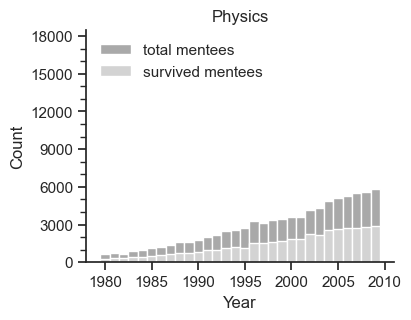

In [114]:
drop_criteria = 10
df = Data[(Data.drop_criteria==drop_criteria)&(Data.current_year<=2009)&(Data.current_year>=1980)].sort_values(by='current_year')
sns.set(style='ticks', font_scale=1.0, font='Arial')
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*4,0.618*5])

ax.bar(df['current_year'],df['num_of_mentee1'],1,label='total mentees',color='darkgrey',alpha=1)
ax.bar(df['current_year'],df['num_of_surviver'],1,label='survived mentees',color='lightgrey',alpha=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0,18500])
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Physics')
ax.legend(loc=2,edgecolor='white')
ax.yaxis.set_major_locator(MultipleLocator(3000))
ax.yaxis.set_minor_locator(MultipleLocator(1000))
ax.set_xticks(ticks=np.arange(1980, 2015,5),labels=np.arange(1980, 2015,5),rotation=0)
fig.savefig('number of mentee.pdf')

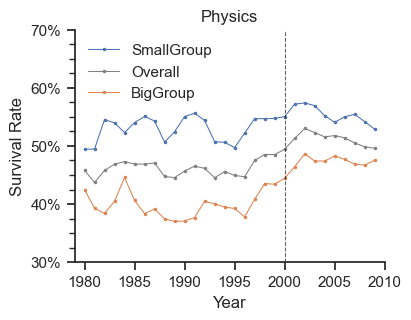

In [107]:
Drop_Criteria = [5,8,10,13,15,18,20]


# input parameter
drop_criteria = 10

df = Data[(Data.drop_criteria==drop_criteria)&(Data.current_year<=2009)&(Data.current_year>=1979)].sort_values(by='current_year')


sns.set(style='ticks', font_scale=1.0, font='Arial')
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*4,0.618*5])

# data
x = list(df.current_year)
y_small = [float(k) for k in list(df.survival_rate_25.rolling(2).mean())]
y_all = [float(k) for k in list(df.survival_rate_all.rolling(2).mean())]
y_big = [float(k) for k in list(df.survival_rate_75.rolling(2).mean())]

# plot
ax.plot(x, y_small, label=f'SmallGroup', marker='.',ms=3,lw=0.75)
ax.plot(x, y_all, label=f'Overall', marker='.',color='grey',ms=3,lw=0.75)
ax.plot(x, y_big, label=f'BigGroup', marker='.',ms=3,lw=0.75)

# annotation set
ax.legend(loc=2,frameon=0)
ax.set(xlim=(x[0], 2009),#|xticks=np.arange(x[0]-1, x[-1]+5,5),
       ylim=(0.3, 0.7),# yticks=np.arange(0.3, 0.71, 0.1),
       xlabel='Year', 
       ylabel='Survival Rate',
       title=f'Physics'
      )
ax.set_xticks(ticks=np.arange(1980, 2015,5),labels=np.arange(1980, 2015,5),rotation=0)
ax.set_yticks(ticks=[0.3,0.4,0.5,0.6,0.7],labels=['30%','40%','50%','60%','70%'])
# ax.axvline(x=2022-3-drop_criteria,ls='--',color='r',lw=0.75)
ax.axvline(x=2000,ls='--',color='k',alpha=0.7,lw=0.75)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.xaxis.set_minor_locator(MultipleLocator(1))

# ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))

# ax.annotate('Accurate Line', xy=(2022-5-drop_criteria, 0.5), xytext=(2022-5-drop_criteria, 0.56),
#             arrowprops=dict(facecolor='r', shrink=0.05,edgecolor='r'),fontsize=10)
plt.show()
fig.savefig('survival_rate.pdf')

In [53]:
year_i = 2005
data_i = average_group_size[average_group_size.first_pub_year==year_i]
data_i

,author_id,first_pub_year,career_len,average_group_size
12,A1004092558,2005,16,18.833333
52,A101307155,2005,14,14.500000
54,A101383955,2005,17,16.625000
71,A1019669161,2005,16,22.250000
77,A1020757165,2005,6,11.833333
...,...,...,...,...
254140,A9873716,2005,6,75.363636
254154,A99165078,2005,17,44.888889
254168,A995841352,2005,3,17.800000
254176,A997262877,2005,2,24.166667


In [54]:
Q75 = np.quantile(data_i['average_group_size'],0.75)
Q50 = np.quantile(data_i['average_group_size'],0.50)
Q25 = np.quantile(data_i['average_group_size'],0.25)
Q10 = np.quantile(data_i['average_group_size'],0.10)
print('(Q75, Q50, Q25, Q10) : ',(Q75,Q50,Q25,Q10))

(Q75, Q50, Q25, Q10) :  (28.76923076923077, 16.428571428571427, 8.285714285714286, 4.25)


In [55]:
drop_criteria = 10
G75 = data_i[data_i.average_group_size>=Q75]
# G75
survial_75 = G75[G75.career_len>=drop_criteria]
survival_rate_75 = len(survial_75)/len(G75[G75.career_len>0])
survival_rate_75_0 = len(survial_75)/len(G75)
print('survival_rate_75,survival_rate_75_0 : ',survival_rate_75,survival_rate_75_0)

G25 = data_i[data_i.average_group_size<=Q25]
# print('len_G25 : ',len(G25))
survial_25 = G25[G25.career_len>=drop_criteria]
# print('len_survival_25 : ',len(survial_25))
survival_rate_25 = len(survial_25)/len(G25[G25.career_len>0])
survival_rate_25_0 = len(survial_25)/len(G25)
print('survival_rate_25,survival_rate_25_0 : ',survival_rate_25,survival_rate_25_0)

survival_rate_75,survival_rate_75_0 :  0.587709497206704 0.47796456156292594
survival_rate_25,survival_rate_25_0 :  0.5839335180055402 0.4788732394366197


##### Case Study

In [118]:
i = random.sample(range(0,len(mentee)),1)[0]
mentee_i = mentee[i]


tp = group_info[['author_id','mentor_id','first_pub_year','career_len','current_year','current_scientific_age','group_size']][group_info.author_id==mentee_i].drop_duplicates()
mentor_i = tp['mentor_id'].tolist()[0]
first_pub_year_i = tp['first_pub_year'].tolist()[0]
print(mentee_i,mentor_i,first_pub_year_i)
tp

A2330391704 A2246089616 2012


,author_id,mentor_id,first_pub_year,career_len,current_year,current_scientific_age,group_size
2638878,A2330391704,A2246089616,2012,1,2014,2,4
2638884,A2330391704,A2246089616,2012,1,2015,3,10
2638903,A2330391704,A2246089616,2012,1,2016,4,11
2638930,A2330391704,A2246089616,2012,1,2017,5,13


In [90]:
group_info[['author_id','first_pub_year','career_len','publication_year','current_year','current_scientific_age','group_size']][(group_info.mentor_id==mentor_i)&(group_info.current_year==first_pub_year_i)].drop_duplicates()

,author_id,first_pub_year,career_len,publication_year,current_year,current_scientific_age,group_size
355571,A2015258572,1976,45,1977,1982,6,12
355572,A2099017348,1976,46,1977,1982,6,12
355573,A2420314315,1974,48,1977,1982,8,12
355574,A3100648638,1975,45,1977,1982,7,12
355575,A2688081795,1973,11,1977,1982,9,12
355576,A3176708939,1976,2,1977,1982,6,12
355581,A682443092,1976,8,1977,1982,6,12
355582,A279689453,1977,0,1977,1982,5,12
355584,A1659926710,1974,3,1977,1982,8,12
355585,A3100648638,1975,45,1978,1982,7,12


##### filter 1: mentor_scientific_age > 5

In [37]:
# group_info = group_info[group_info.mentor_scientific_age>10]
# len(group_info)

3626500

##### supplementary plot

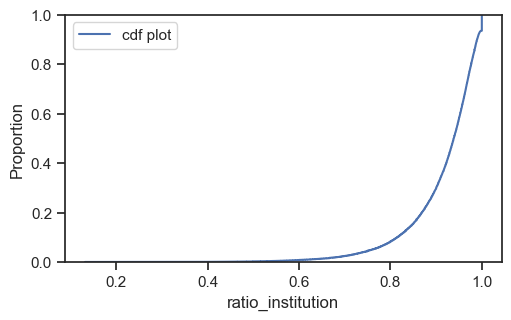

In [36]:
ratio_institution = group_info[['work_id','ratio_institution']].drop_duplicates()

# display preset
sns.set(style='ticks', font_scale=1.0, font='Arial')

fig, ax = plt.subplots(constrained_layout=True,figsize=[1*5,0.618*5])

# plot
# sns.histplot(data=ratio_institution, x="ratio_institution",stat='proportion', #cumulative=1,
#              ax=ax,label='pdf plot')

sns.ecdfplot(data=ratio_institution, x="ratio_institution",stat='proportion',complementary=0,
             ax=ax,label='cdf plot')
plt.legend()

##### done

In [ ]:
def survial_rate(data,current_year,drop_criteria,mentor_scientific_age):
    group_info_data = data
    
    group_info_2000 = group_info_data[['author_id','group_size','career_len','mentor_id']][(group_info_data.current_year==current_year)
                            &(group_info_data.mentor_scientific_age>=mentor_scientific_age)].drop_duplicates()
    
    # if a mentee works with two mentor, we use the average group size of two mentor as the mentee's group size
    group_info_2000 = group_info_2000.groupby(['author_id','career_len'])['group_size'].agg('mean').reset_index(name='group_size')
    
    num_of_mentee = len(group_info_2000)
    survial_all = group_info_2000[group_info_2000.career_len>drop_criteria]
    
    # print(len(group_info_2000))
    Q75 = np.quantile(group_info_2000['group_size'],0.75)
    Q25 = np.quantile(group_info_2000['group_size'],0.25)
    
    G75 = group_info_2000[group_info_2000.group_size>=Q75]
    # print('len_G75 : ',len(G75))
    survial_75 = G75[G75.career_len>drop_criteria]
    # print('len_survival_75 : ',len(survial_75))
    survival_rate_75 = len(survial_75)/len(G75)
    # print('survival_rate_75 : ',survival_rate_75)
    
    G25 = group_info_2000[group_info_2000.group_size<=Q25]
    # print('len_G25 : ',len(G25))
    survial_25 = G25[G25.career_len>drop_criteria]
    # print('len_survival_25 : ',len(survial_25))
    survival_rate_25 = len(survial_25)/len(G25)
    # print('survival_rate_25 : ',survival_rate_25)
    
    return num_of_mentee,survival_rate_75,survival_rate_25